In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


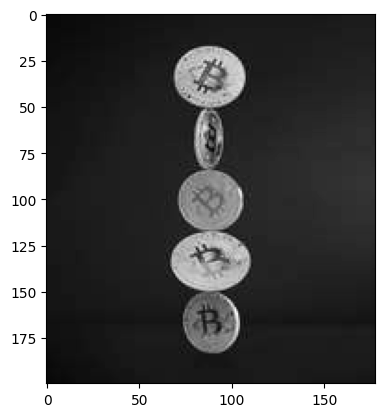

In [5]:
image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

For counting, we have to detect the edges but before detecting the edges we have to make the image blur to avoid the noises. Use “cv2.GaussianBlur(image-name, Kernal size, std. deviation)”.

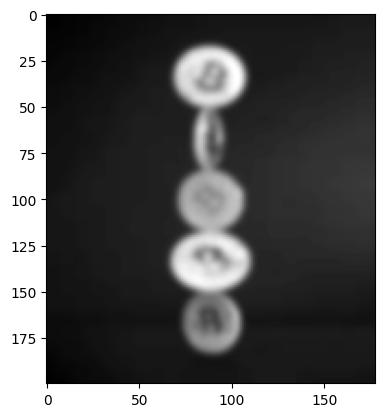

In [6]:
blur = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(blur, cmap='gray')

Now we will detect edges using a canny algorithm, 2nd & 3rd parameters in cv2.canny() function are threshold values. a value between 30 & 150 are consider as an edge for this image.

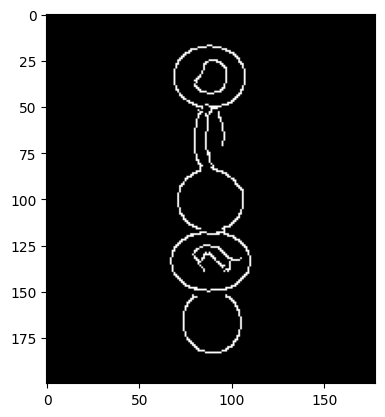

In [7]:
canny = cv2.Canny(blur, 30,150, 3)
plt.imshow(canny, cmap="gray")

We can see that edges are not connected. We need to connect the edges, have to make more thiker & visible.

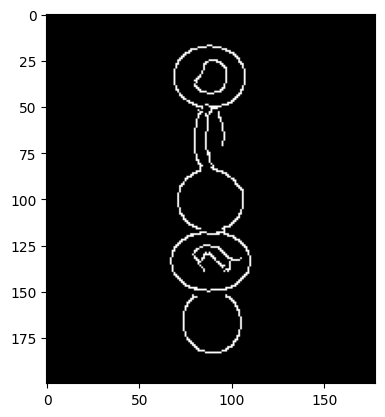

In [8]:
dilated = cv2.dilate(canny, (1,1), iterations=0)
plt.imshow(dilated, cmap='gray')

 Now we have to calculate the contour in the image & convert the image into RGB from BGR & then draw the contours.

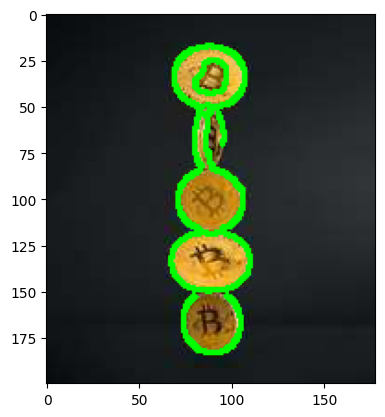

In [9]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)


Printing the result

In [10]:
print("coins in the image : ", len(cnt))

coins in the image :  5


Below is the complete implementation:

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 30, 150,3)
dilated = cv2.dilate(canny,(1,1), iterations = 0)

(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,
                                    cv2.CHAIN_APPROX_NONE)
rgb = cv2. cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2 )

print("coins in the image :", len(cnt))

coins in the image : 5
